In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

from create_input.lmp.info_from_lmp_out import LammpsLogParser
from scf.qelattice import get_qel

In [2]:
def get_two_body_force(path2root):
    pathes = glob(f'{path2root}/tb*')
    pathes.sort()
    result = []
    for path in pathes:
        try:
            r_from_path = float(path.split('/')[-1].split('_')[-1])
            obj = LammpsLogParser(path2target=path, dump_filename='dump.out')
            force = obj.get_force()
            result.append([r_from_path, force[1][1]])
        except:
            print(path)
            continue
    return np.array(result)

def get_dimer_result(path2target):
    dirs = glob(f'{path2target}/scf*')
    result = []
    for d in dirs:
        try:
            qel = get_qel(d)
            coord = qel.get_coord()
            vol = qel.get_vol()
            dist = np.linalg.norm(coord[0]-coord[1])
            result.append([vol, dist, qel.get_energy(), d.split('/')[-1], qel.get_force()[1][0]])
        except Exception as e:
            continue
            # print(d , e)
            
    return pd.DataFrame(data=result, columns=['vol', 'distance', 'energy', 'path', 'force'])

def plot_two_body(result, label, ax):
    ax.plot(result[:,0], result[:,1], label=label, lw=2, marker='o')

In [3]:
path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl/model_21'
result_ml_zbl = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-ga/model_10'
result_ml_ga = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/gafit'
result_gafit = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl-modified'
result_ml_zbl_mod = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml-zbl-qe'
result_ml_zbl_qe = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/ml/model_21'
result_ml = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/zbl/1.3'
result_zbl = get_two_body_force(path2root)

path2root = '/Users/y1u0d2/desktop/Lab/result/lammps/Si/two-body-potential/deepmd/model26'
result_dp = get_two_body_force(path2root)

path2target = '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result'
result_qe = get_dimer_result(path2target)
result_qe = result_qe.sort_values(by='distance')

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_88437/356104097.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


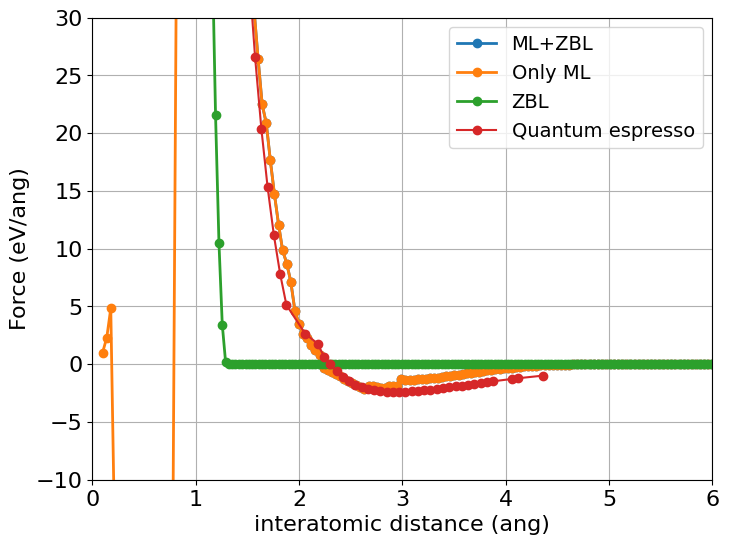

In [12]:
fs = 16

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')
ax = fig.add_subplot(111)

plot_two_body(result_ml_zbl, label='ML+ZBL', ax=ax)
plot_two_body(result_ml, label='Only ML', ax=ax)
plot_two_body(result_zbl, label='ZBL', ax=ax)
# plot_two_body(result_ml_ga, label='ML+Gaussian(fit)', ax=ax)
# plot_two_body(result_dp, label='DP-ZBL', ax=ax)
# plot_two_body(result_gafit, label='Gaussian(fit)', ax=ax)
# plot_two_body(result_ml_zbl_mod, label='ML+ZBL modified', ax=ax)
# plot_two_body(result_ml_zbl_qe, label='ML+ZBL-QE', ax=ax)
ax.plot(result_qe['distance'], result_qe['force'], label='Quantum espresso', marker='o')

# ax.set_title('Comparison of potentials', fontsize=fs)
ax.set_xlabel('interatomic distance (ang)', fontsize=fs)
ax.set_ylabel('Force (eV/ang)', fontsize=fs)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid()
ax.legend(fontsize=14)

ax.set_ylim(-10, 30)   
ax.set_xlim(0., 6.0)

fig.show()